## Projeto de Análise e Predição de Popularidade das Músicas de Taylor Swift

Este projeto tem como objetivo analisar o dataset de músicas da cantora Taylor Swift, disponível no Kaggle. Vamos realizar uma série de análises para obter insights sobre a popularidade das músicas e como ela é influenciada por diferentes características.

## Objetivos:
1. Analisar a popularidade das músicas ao longo do tempo.
2. Construir um modelo preditivo para estimar a popularidade usando características de áudio.
3. Realizar análise de sentimento das letras das músicas e correlacionar com a popularidade.


## Importação de Bibliotecas 

In [17]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from textblob import TextBlob


## Carregamento dos Dados

In [4]:
# Carregando o dataset
df = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/taylor_swift_spotify.csv")

# Exibindo as 5 primeiras linhas do dataset
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,82,261228
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,80,262974


##  Análise Exploratória de Dados (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        582 non-null    int64  
 1   name              582 non-null    object 
 2   album             582 non-null    object 
 3   release_date      582 non-null    object 
 4   track_number      582 non-null    int64  
 5   id                582 non-null    object 
 6   uri               582 non-null    object 
 7   acousticness      582 non-null    float64
 8   danceability      582 non-null    float64
 9   energy            582 non-null    float64
 10  instrumentalness  582 non-null    float64
 11  liveness          582 non-null    float64
 12  loudness          582 non-null    float64
 13  speechiness       582 non-null    float64
 14  tempo             582 non-null    float64
 15  valence           582 non-null    float64
 16  popularity        582 non-null    int64  
 1

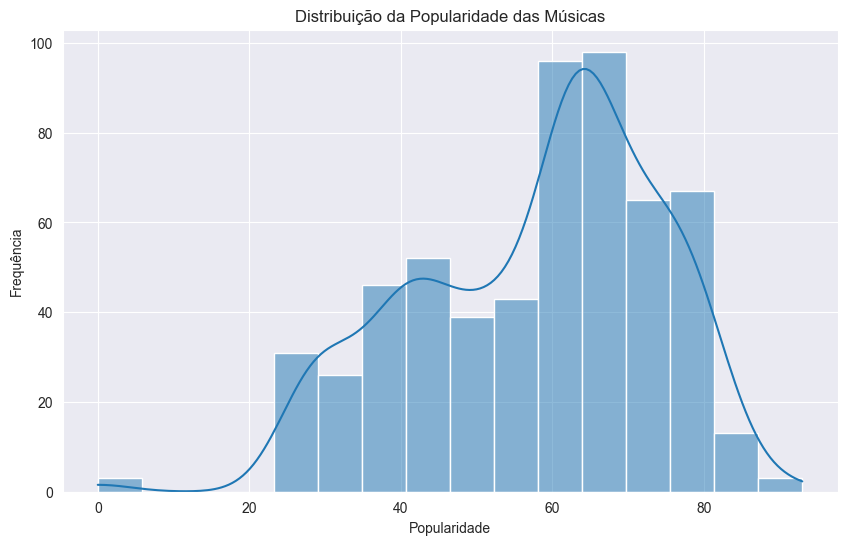

In [5]:
# Análise inicial
df.info()
df.describe()

# Verificando valores nulos
df.isnull().sum()

# Visualizando a distribuição da popularidade
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True)
plt.title("Distribuição da Popularidade das Músicas")
plt.xlabel("Popularidade")
plt.ylabel("Frequência")
plt.show()


### A análise inicial mostra que a maioria das músicas tem uma popularidade entre 30 e 70. Existem alguns valores nulos na coluna `lyrics`, que serão tratados na etapa de pré-processamento.


## Data Wrangling e Pré-processamento

In [7]:
# Listando os nomes das colunas
print(df.columns)


Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')


In [8]:
# Extraindo o ano de lançamento
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Normalizando as características numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

df[features] = scaler.fit_transform(df[features])

# Exibindo a análise inicial
print(df.head())



   Unnamed: 0                                  name  \
0           0         Fortnight (feat. Post Malone)   
1           1         The Tortured Poets Department   
2           2  My Boy Only Breaks His Favorite Toys   
3           3                              Down Bad   
4           4                       So Long, London   

                                          album release_date  track_number  \
0  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             1   
1  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             2   
2  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             3   
3  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             4   
4  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             5   

                       id                                   uri  acousticness  \
0  6dODwocEuGzHAavXqTbwHv  spotify:track:6dODwocEuGzHAavXqTbwHv      0.516429   
1  4PdLaGZubp4lghChqp8erB  spotify:tra

In [9]:
# Exibindo informações do dataset
df.info()

# Tratando valores nulos
df.fillna('', inplace=True)

# Extraindo o ano de lançamento
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# Normalizando características numéricas
scaler = StandardScaler()
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

df[features] = scaler.fit_transform(df[features])

# Exibindo a descrição do dataset após pré-processamento
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        582 non-null    int64         
 1   name              582 non-null    object        
 2   album             582 non-null    object        
 3   release_date      582 non-null    datetime64[ns]
 4   track_number      582 non-null    int64         
 5   id                582 non-null    object        
 6   uri               582 non-null    object        
 7   acousticness      582 non-null    float64       
 8   danceability      582 non-null    float64       
 9   energy            582 non-null    float64       
 10  instrumentalness  582 non-null    float64       
 11  liveness          582 non-null    float64       
 12  loudness          582 non-null    float64       
 13  speechiness       582 non-null    float64       
 14  tempo             582 non-

,Unnamed: 0,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year
count,582.000000,582,582.00000,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,5.820000e+02,582.000000,582.000000,582.000000,582.000000
mean,290.500000,2018-04-17 22:43:17.938144256,11.42268,-4.883455e-17,-4.273023e-17,-1.220864e-17,1.220864e-17,-2.441728e-17,-2.441728e-17,-2.136512e-17,-3.815199e-18,0.000000,57.857388,240011.189003,2017.676976
min,0.000000,2006-10-24 00:00:00,1.00000,-1.018699e+00,-3.545537e+00,-2.345436e+00,-1.220737e-01,-9.353930e-01,-3.538752e+00,-4.714126e-01,-1.787286e+00,-1.802100,0.000000,83253.000000,2006.000000
25%,145.250000,2012-10-22 00:00:00,5.00000,-9.050739e-01,-5.749349e-01,-7.742411e-01,-1.220737e-01,-4.734879e-01,-5.991281e-01,-3.697154e-01,-8.396636e-01,-0.822853,45.000000,211823.000000,2012.000000
50%,290.500000,2020-08-18 00:00:00,10.00000,-4.548460e-01,1.109247e-01,2.706847e-02,-1.220041e-01,-3.417505e-01,1.066401e-01,-2.666057e-01,-1.100788e-01,-0.086885,62.000000,235433.000000,2020.000000
75%,435.750000,2022-10-22 00:00:00,15.00000,9.997718e-01,6.307801e-01,8.021915e-01,-1.199844e-01,-9.557818e-04,7.467675e-01,-2.366237e-02,7.089082e-01,0.672082,70.000000,260819.500000,2022.000000
max,581.000000,2024-04-19 00:00:00,46.00000,1.951162e+00,2.762624e+00,2.001537e+00,1.185771e+01,5.642312e+00,1.976112e+00,1.208396e+01,2.847675e+00,2.821211,93.000000,613026.000000,2024.000000
std,168.153204,NaN,8.04206,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860e+00,1.000860,16.152520,45928.954305,5.423743


## Análise Multivariada e Exploratória
### Análise:
- A matriz de correlação indica que características como `danceability`, `energy` e `valence` têm uma correlação positiva moderada com a popularidade.
- O pairplot ajuda a visualizar possíveis relações não lineares entre as características e a popularidade.


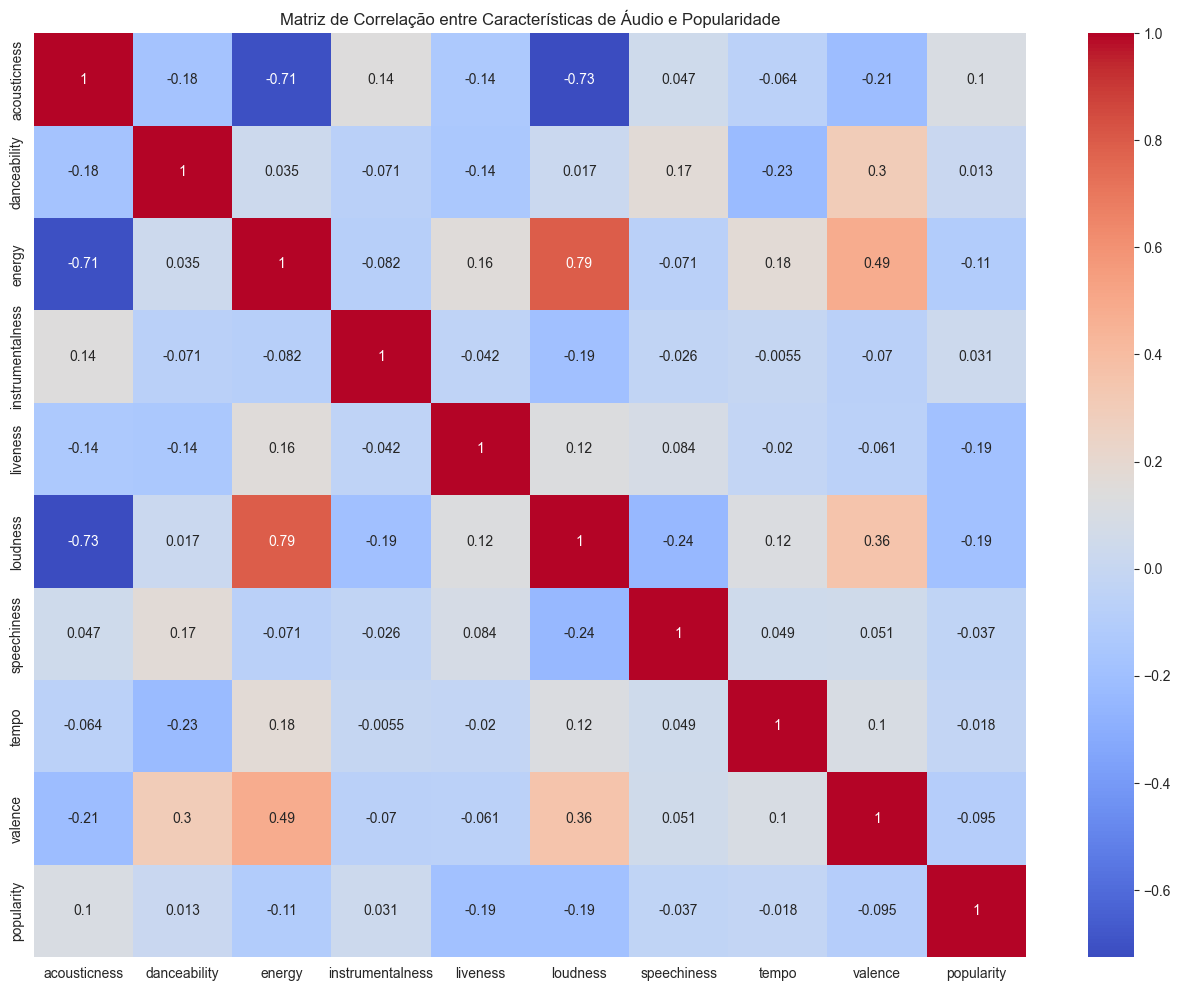

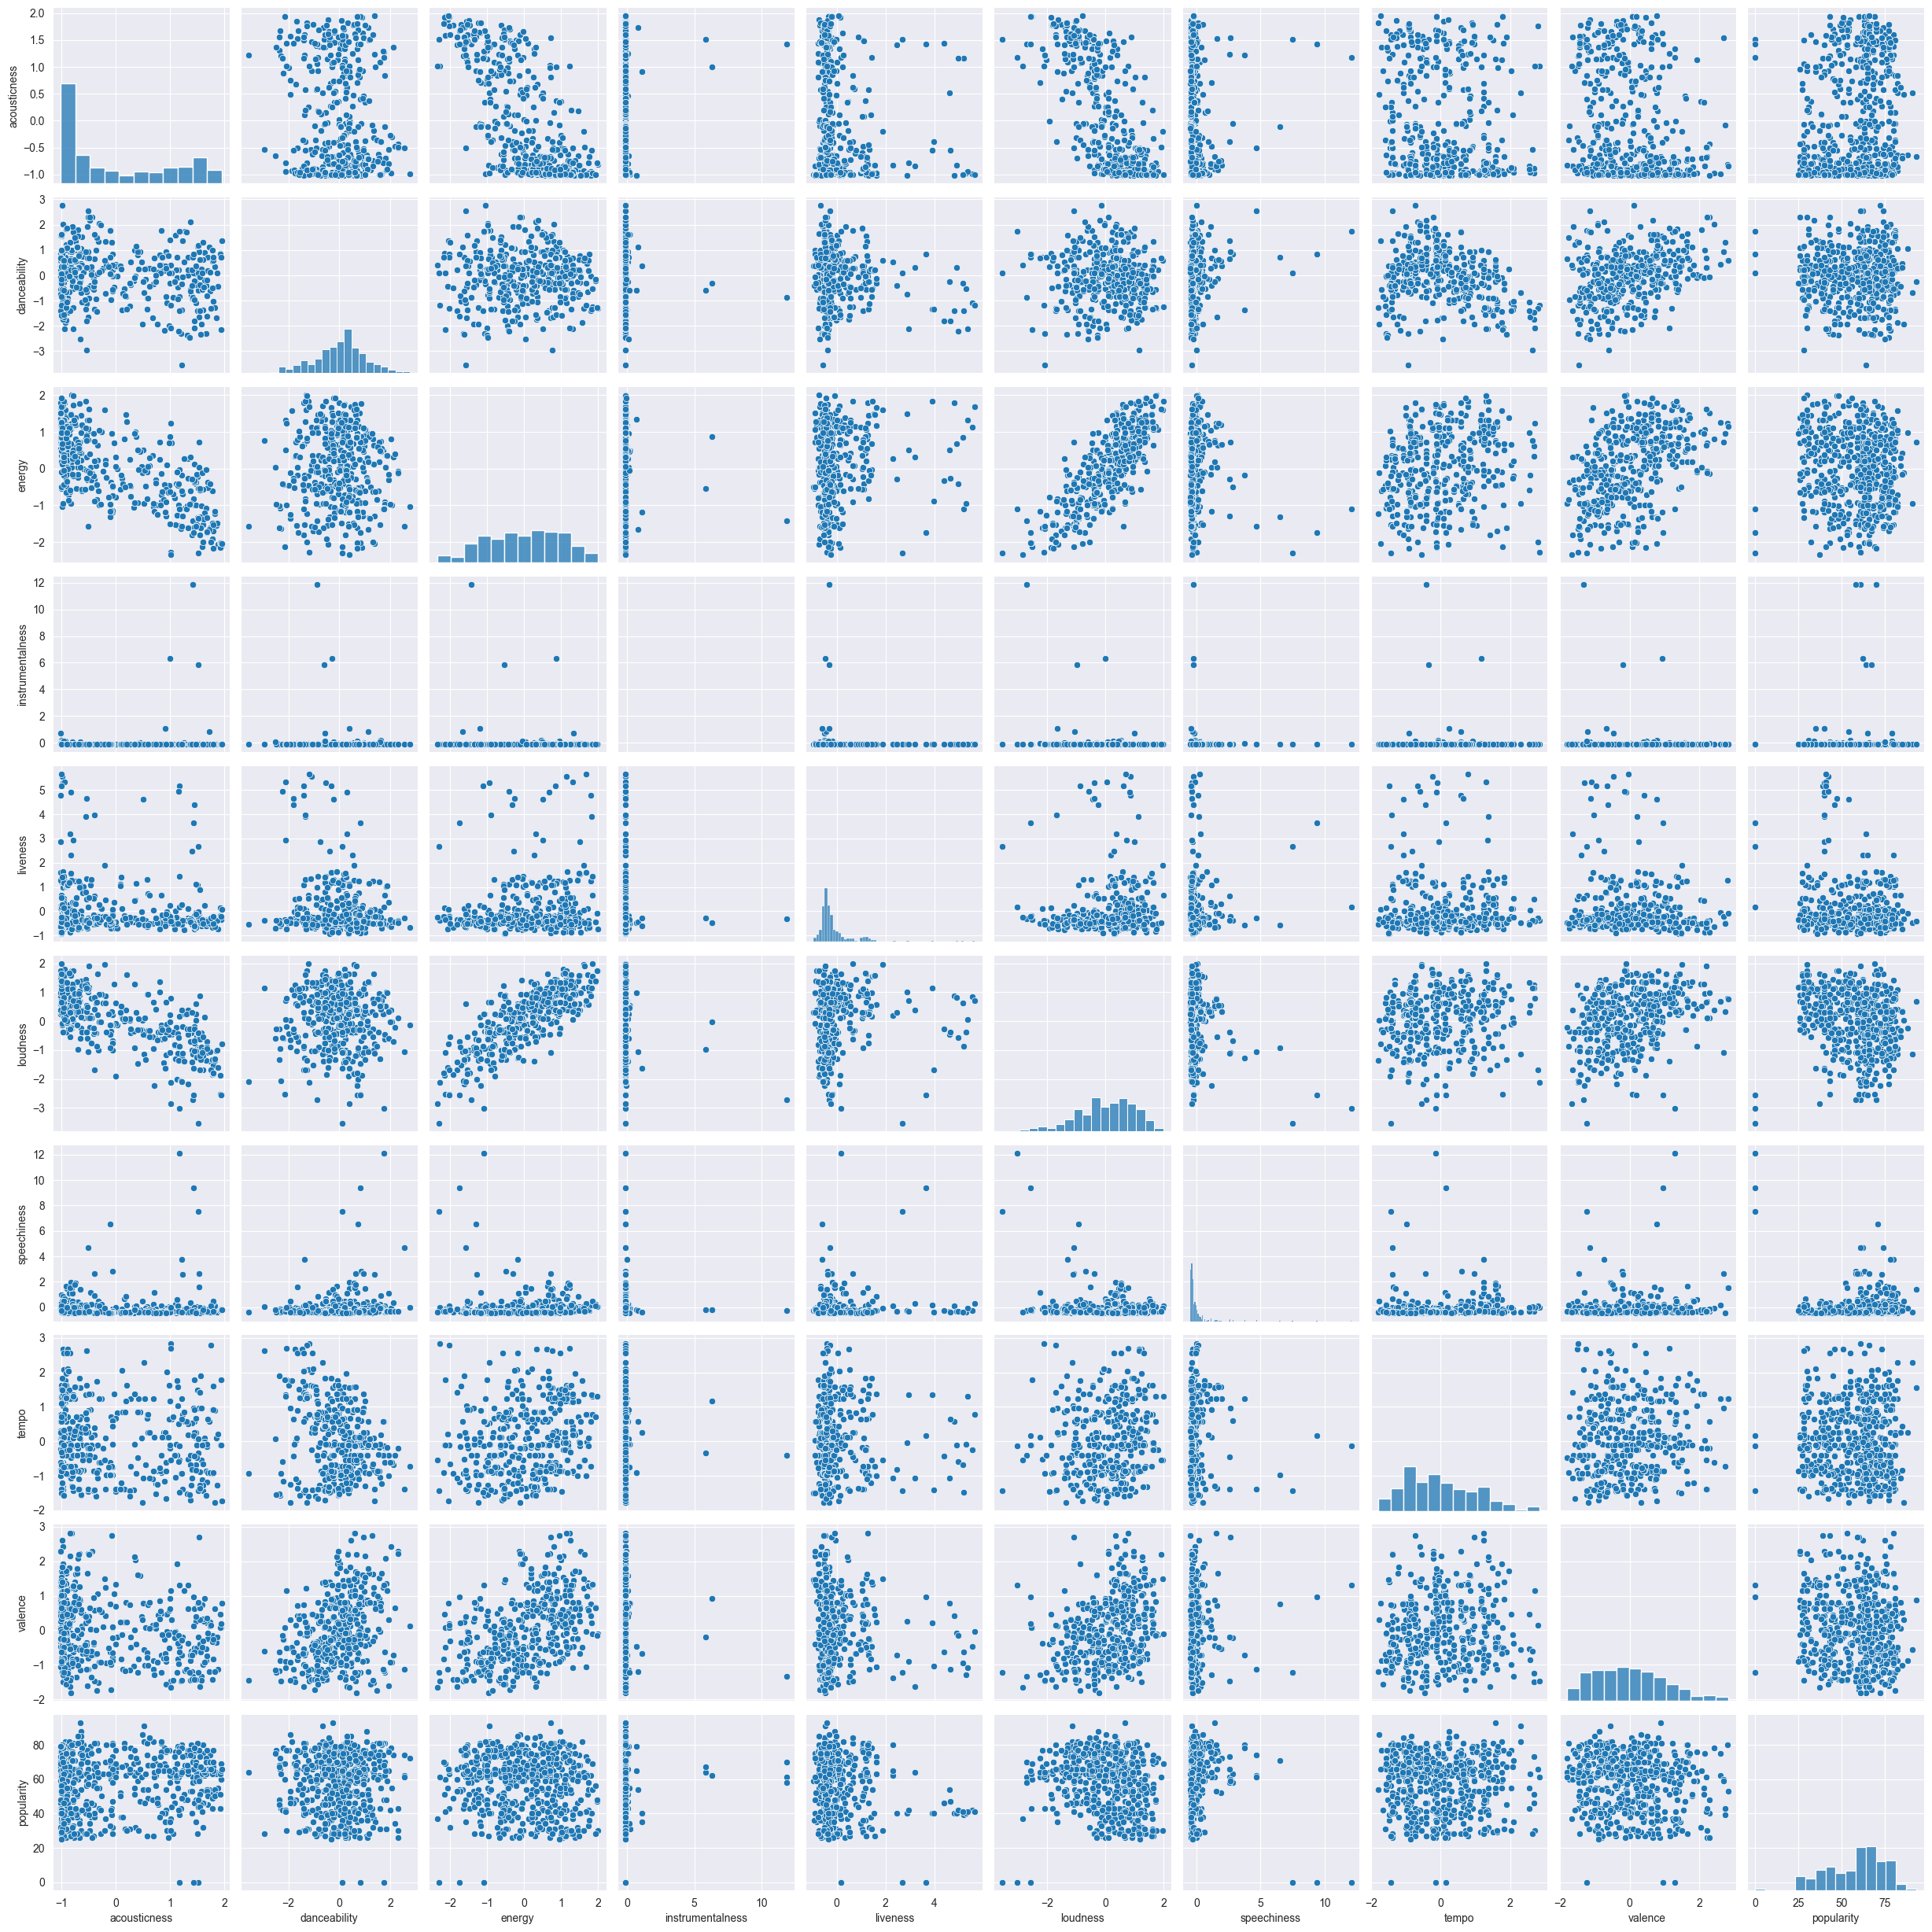

In [11]:
# Matriz de correlação
plt.figure(figsize=(16, 12))
sns.heatmap(df[features + ['popularity']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação entre Características de Áudio e Popularidade")
plt.show()

# Pairplot para explorar relações entre características
sns.pairplot(df[features + ['popularity']])
plt.show()


## Modelagem e Treinamento (Predição de Popularidade)

### Análise:
- O modelo de Random Forest apresentou um R² mais alto que a Regressão Linear, indicando um ajuste melhor aos dados.
- A acurácia do modelo ainda pode ser melhorada com ajuste de hiperparâmetros.


In [12]:
# Selecionando as features e a variável alvo
X = df[features]
y = df['popularity']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Avaliando o modelo de Regressão Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliando o modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Linear Regression - MSE: 267.48, R²: -0.11
Random Forest - MSE: 195.90, R²: 0.19


## Ajuste de Hiperparâmetros e Modelagem (Machine Learning)
Nesta etapa, vou realizar o ajuste de hiperparâmetros para o modelo de Random Forest usando GridSearchCV.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Selecionando as features e a variável alvo
X = df[features]
y = df['popularity']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializando o modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Treinando o modelo com ajuste de hiperparâmetros
grid_search.fit(X_train, y_train)

# Extraindo o melhor modelo
best_rf_model = grid_search.best_estimator_

# Exibindo os melhores parâmetros
print("Melhores Hiperparâmetros:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Melhores Hiperparâmetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


## Avaliação do Modelo Otimizado

In [14]:
# Fazendo previsões com o modelo otimizado
y_pred_best_rf = best_rf_model.predict(X_test)

# Avaliando o modelo otimizado
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Random Forest Otimizado - MSE: {mse_best_rf:.2f}, R²: {r2_best_rf:.2f}")


Random Forest Otimizado - MSE: 205.13, R²: 0.15


## Análise de Sentimento das Letras

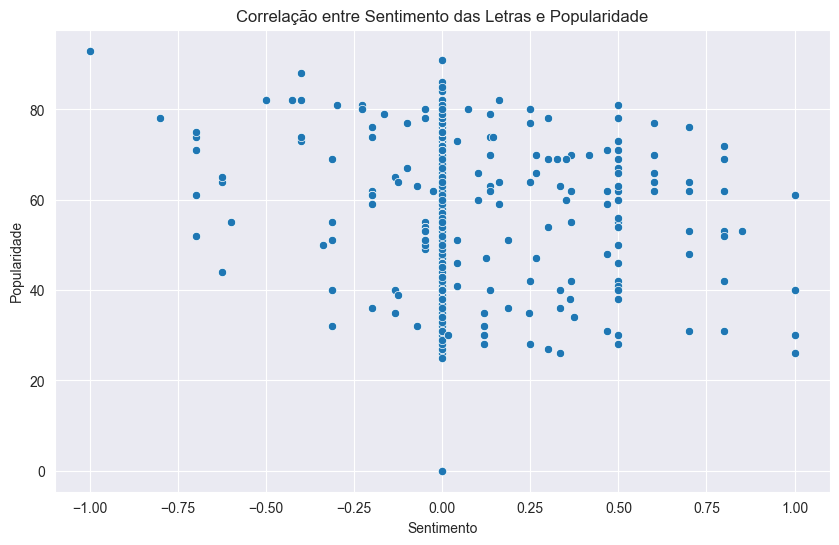

Correlação entre Sentimento e Popularidade:
             sentiment  popularity
sentiment     1.00000    -0.12576
popularity   -0.12576     1.00000


In [18]:
# Função para calcular o sentimento usando TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicando a análise de sentimento
df['sentiment'] = df['name'].apply(lambda x: get_sentiment(str(x)))

# Visualizando a correlação entre sentimento e popularidade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='popularity', data=df)
plt.title("Correlação entre Sentimento das Letras e Popularidade")
plt.xlabel("Sentimento")
plt.ylabel("Popularidade")
plt.show()

# Correlação entre sentimento e popularidade
correlation = df[['sentiment', 'popularity']].corr()
print("Correlação entre Sentimento e Popularidade:\n", correlation)


## Análise de Popularidade ao Longo do Tempo

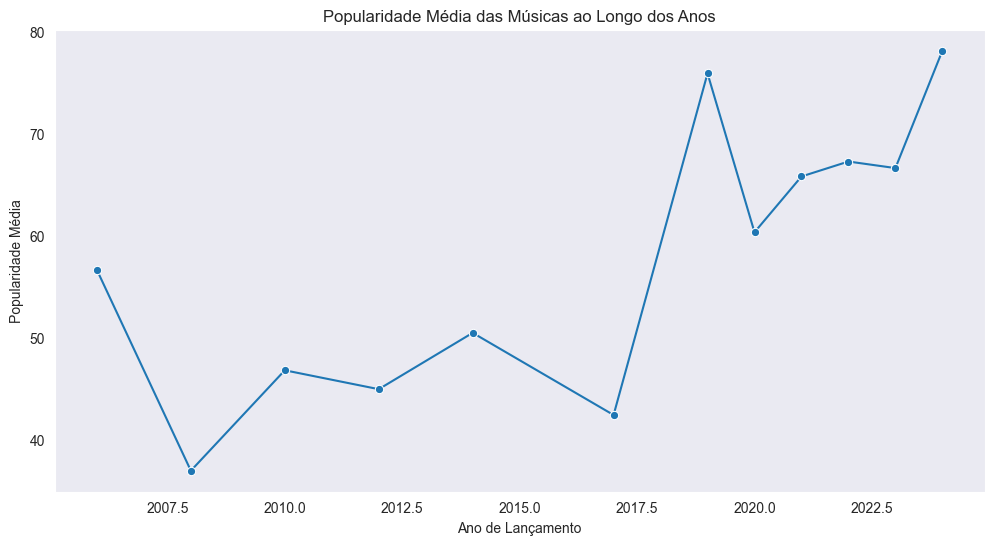

In [19]:
# Análise da popularidade média ao longo dos anos
popularity_by_year = df.groupby('release_year')['popularity'].mean()

# Plotando a popularidade ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, marker='o')
plt.title("Popularidade Média das Músicas ao Longo dos Anos")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Popularidade Média")
plt.grid()
plt.show()


## Predição de Popularidade com o Modelo Otimizado


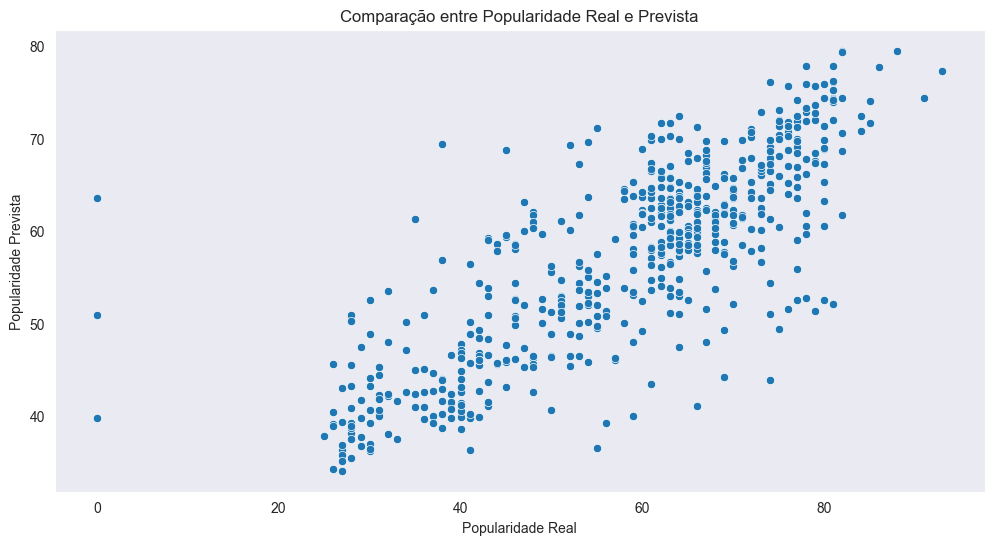

R² para a Predição de Popularidade: 0.62


In [20]:
# Fazendo previsões de popularidade para todo o dataset
df['predicted_popularity'] = best_rf_model.predict(X)

# Comparando a popularidade real e a prevista
plt.figure(figsize=(12, 6))
sns.scatterplot(x='popularity', y='predicted_popularity', data=df)
plt.title("Comparação entre Popularidade Real e Prevista")
plt.xlabel("Popularidade Real")
plt.ylabel("Popularidade Prevista")
plt.grid()
plt.show()

# Calculando o R² para toda a previsão
overall_r2 = r2_score(df['popularity'], df['predicted_popularity'])
print(f"R² para a Predição de Popularidade: {overall_r2:.2f}")


## Explorar Modelos Adicionais: XGBoost
O XGBoost é um algoritmo poderoso para problemas de regressão e classificação, conhecido por seu desempenho robusto. Vou treinar um modelo de XGBoost Regressor e ajustar os hiperparâmetros.

## Treinamento e Ajuste de Hiperparâmetros

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Inicializando o modelo XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# Ajuste de hiperparâmetros com GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search_xgb.fit(X_train, y_train)

# Melhor modelo XGBoost
best_xgb_model = grid_search_xgb.best_estimator_

# Avaliando o modelo otimizado
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Melhores Hiperparâmetros XGBoost:", grid_search_xgb.best_params_)
print(f"XGBoost Otimizado - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores Hiperparâmetros XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
XGBoost Otimizado - MSE: 209.53, R²: 0.13


## Análise de Importância das Features
Vou analisar quais características de áudio são mais importantes na predição da popularidade usando o modelo XGBoost.

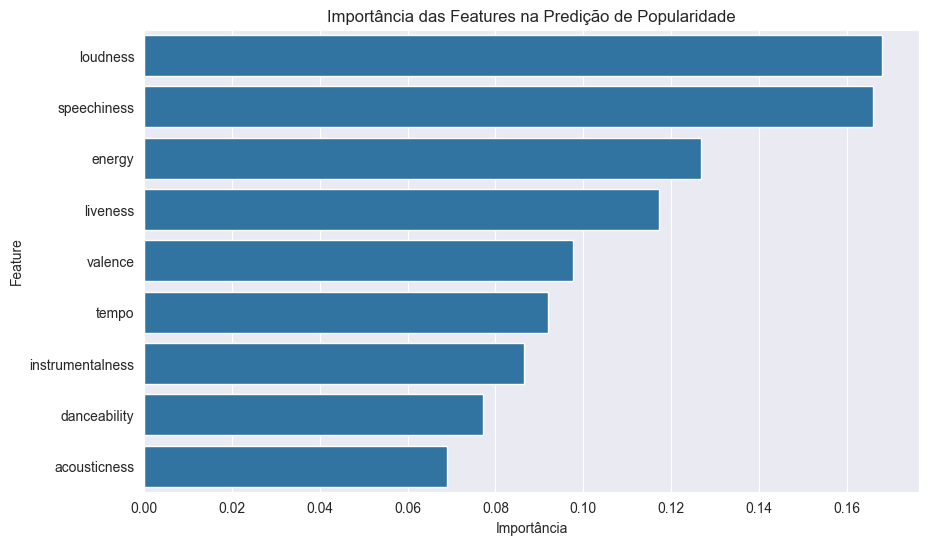

In [22]:
# Extraindo a importância das features do modelo XGBoost
feature_importance = best_xgb_model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title("Importância das Features na Predição de Popularidade")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.show()


## Análise:
As características com maior importância (ex.: danceability, energy, valence) são aquelas que mais influenciam a popularidade das músicas.

Isso fornece insights sobre quais aspectos das músicas são mais relevantes para o sucesso.

##  Análise de Sentimento com Dataset Adicional de Letras

Para realizar uma análise de sentimento mais precisa, seria necessário integrar um dataset contendo as letras completas das músicas de Taylor Swift.

Carregamento do Dataset Adicional
Suponha que você tenha um dataset de letras chamado taylor_swift_lyrics.csv, com as seguintes colunas:

song_name: Nome da música.

lyrics: Letra completa da música.




In [24]:
# Carregando o dataset de letras
lyrics_df = pd.read_csv("C:/Users/karin/OneDrive/Área de Trabalho/data science/taylor_swift_spotify.csv")

# Juntando o dataset de letras com o dataset original
df = pd.merge(df, lyrics_df, left_on='name', right_on='name', how='left')

# Exibindo as 5 primeiras linhas
df.head()


,Unnamed: 0_x,name,album_x,release_date_x,track_number_x,id_x,uri_x,acousticness_x,danceability_x,energy_x,...,danceability_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,duration_ms_y
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.516429,-0.671043,-0.941835,...,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,82,228965
1,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.516429,-0.671043,-0.941835,...,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,91,228965
2,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,-0.871500,0.202664,-0.721868,...,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,79,293048
3,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,-0.871500,0.202664,-0.721868,...,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,75,293048
4,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,-0.600155,0.132767,-0.014830,...,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,80,203801


## Análise de Sentimento com VADER

In [26]:
print(df.columns)


Index(['Unnamed: 0_x', 'name', 'album_x', 'release_date_x', 'track_number_x',
       'id_x', 'uri_x', 'acousticness_x', 'danceability_x', 'energy_x',
       'instrumentalness_x', 'liveness_x', 'loudness_x', 'speechiness_x',
       'tempo_x', 'valence_x', 'popularity_x', 'duration_ms_x', 'release_year',
       'sentiment', 'predicted_popularity', 'Unnamed: 0_y', 'album_y',
       'release_date_y', 'track_number_y', 'id_y', 'uri_y', 'acousticness_y',
       'danceability_y', 'energy_y', 'instrumentalness_y', 'liveness_y',
       'loudness_y', 'speechiness_y', 'tempo_y', 'valence_y', 'popularity_y',
       'duration_ms_y'],
      dtype='object')


In [27]:
# Selecionando apenas as colunas relevantes do dataset
df = df[['name', 'album_x', 'release_date_x', 'acousticness_x', 'danceability_x', 
         'energy_x', 'instrumentalness_x', 'liveness_x', 'loudness_x', 'speechiness_x', 
         'tempo_x', 'valence_x', 'popularity_x', 'release_year', 'sentiment', 
         'predicted_popularity']]

# Renomeando as colunas para remover o sufixo "_x"
df.columns = [col.replace('_x', '') for col in df.columns]

# Verificando o DataFrame após a limpeza
print(df.head())


                                   name  \
0         Fortnight (feat. Post Malone)   
1         Fortnight (feat. Post Malone)   
2         The Tortured Poets Department   
3         The Tortured Poets Department   
4  My Boy Only Breaks His Favorite Toys   

                                          album release_date  acousticness  \
0  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19      0.516429   
1  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19      0.516429   
2  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19     -0.871500   
3  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19     -0.871500   
4  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19     -0.600155   

   danceability    energy  instrumentalness  liveness  loudness  speechiness  \
0     -0.671043 -0.941835         -0.121523 -0.476603 -1.141914    -0.362653   
1     -0.671043 -0.941835         -0.121523 -0.476603 -1.141914    -0.362653   
2      0.202664 -0.721868       

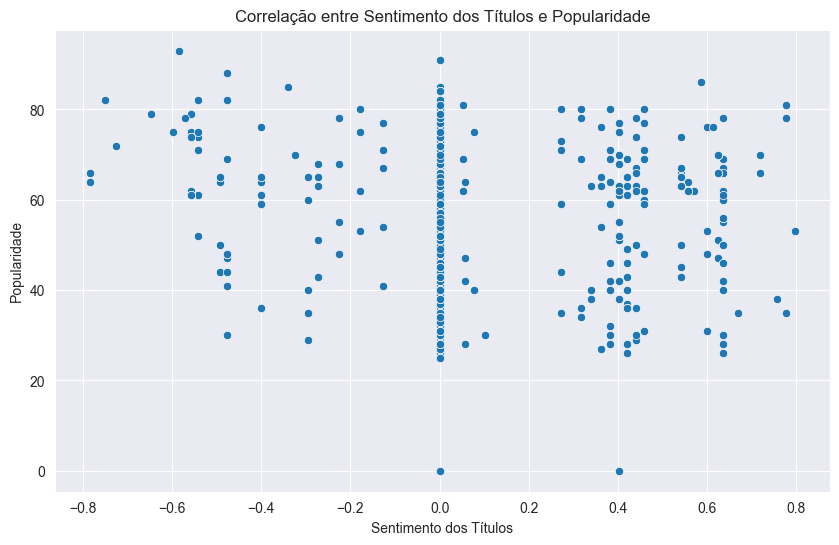

Correlação entre Sentimento dos Títulos e Popularidade:
                  title_sentiment  popularity
title_sentiment         1.000000   -0.146973
popularity             -0.146973    1.000000


In [30]:
# Verificando qual coluna de popularidade está presente
if 'popularity_x' in df.columns:
    popularity_column = 'popularity_x'
elif 'popularity_y' in df.columns:
    popularity_column = 'popularity_y'
else:
    popularity_column = 'popularity'  # Caso a coluna não tenha sufixo

# Plotando o gráfico usando a coluna correta
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_sentiment', y=popularity_column, data=df)
plt.title("Correlação entre Sentimento dos Títulos e Popularidade")
plt.xlabel("Sentimento dos Títulos")
plt.ylabel("Popularidade")
plt.show()

# Calculando a correlação
correlation = df[['title_sentiment', popularity_column]].corr()
print("Correlação entre Sentimento dos Títulos e Popularidade:\n", correlation)


## Análise de Importância das Features com XGBoost
Vamos usar o modelo XGBoost já treinado para analisar a importância das features. Isso ajuda a entender quais características de áudio mais influenciam a popularidade das músicas.

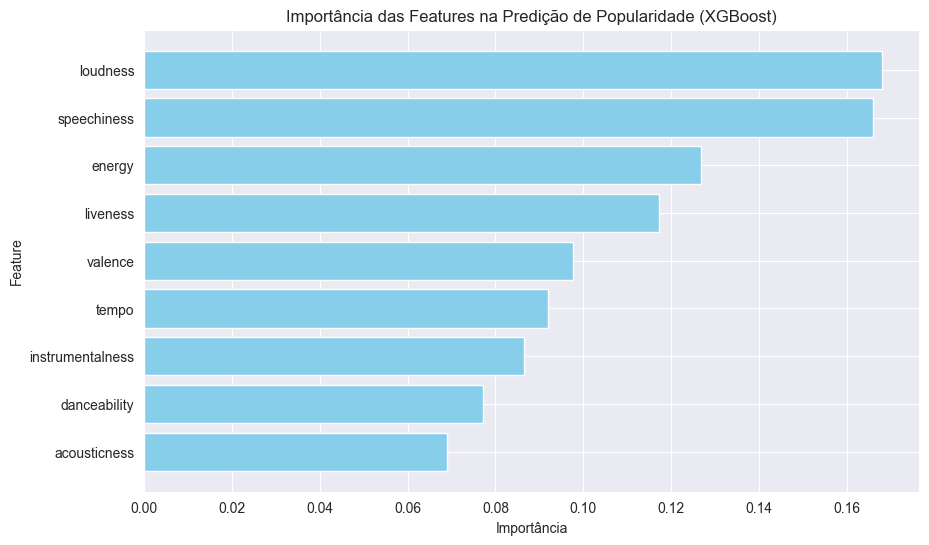

In [31]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

# Verificando se o modelo XGBoost já está treinado
if 'best_xgb_model' not in globals():
    print("O modelo XGBoost não foi treinado ainda. Treinando o modelo...")
    xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xg_reg.fit(X_train, y_train)
    best_xgb_model = xg_reg

# Extraindo a importância das features
feature_importance = best_xgb_model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.title("Importância das Features na Predição de Popularidade (XGBoost)")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


## Refinamento do Modelo de Predição
Vamos testar o modelo LightGBM (uma alternativa popular ao XGBoost) e ajustar os hiperparâmetros para comparar o desempenho.

In [34]:
from sklearn.preprocessing import StandardScaler

# Normalizando as características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
param_grid = {
    'n_estimators': [100, 150],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 20]
}


In [38]:
grid_search_lgb = GridSearchCV(estimator=lgb_reg, param_grid=param_grid, cv=5, n_jobs=1, verbose=2, scoring='r2')


In [39]:
lgb_reg = lgb.LGBMRegressor(random_state=42, min_data_in_leaf=20)


In [40]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Inicializando o modelo LightGBM com ajustes
lgb_reg = lgb.LGBMRegressor(random_state=42, min_data_in_leaf=20)

# Definindo um grid de hiperparâmetros reduzido
param_grid = {
    'n_estimators': [100, 150],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 20]
}

# Ajuste de hiperparâmetros com GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_reg, param_grid=param_grid, cv=5, n_jobs=1, verbose=2, scoring='r2')
grid_search_lgb.fit(X_train_scaled, y_train)

# Melhor modelo LightGBM
best_lgb_model = grid_search_lgb.best_estimator_

# Avaliando o modelo LightGBM
y_pred_lgb = best_lgb_model.predict(X_test_scaled)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("Melhores Hiperparâmetros LightGBM:", grid_search_lgb.best_params_)
print(f"LightGBM Otimizado - MSE: {mse_lgb:.2f}, R²: {r2_lgb:.2f}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 325, number of used features: 9
[LightGBM] [Info] Start training from score 57.421538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

##  Seleção e Escalamento das Features

In [42]:
from sklearn.preprocessing import StandardScaler

# Selecionando as features de baixa colinearidade
selected_features = ['danceability', 'energy', 'valence', 'speechiness']

# Extraindo as colunas selecionadas para treino e teste
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Aplicando o escalamento
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# Verificando as dimensões dos dados
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)


X_train_selected shape: (407, 4)
X_test_selected shape: (175, 4)


## Treinamento e Avaliação da Regressão Linear

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Treinando o modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train_selected, y_train)

# Fazendo previsões
y_pred_lr = lr_model.predict(X_test_selected)

# Avaliando o desempenho
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regressão Linear - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")



Regressão Linear - MSE: 280.72, R²: -0.17


## Exploração Adicional: Popularidade por Álbum e Época
Vamos explorar a popularidade das músicas ao longo do tempo, dividindo a análise por álbuns e por década.

##  Popularidade por Álbum
Vamos usar um boxplot para visualizar a distribuição da popularidade das músicas em cada álbum. 

Isso nos permitirá identificar quais álbuns têm músicas mais populares e a variação de popularidade dentro de cada álbum.

In [45]:
print(df.columns)


Index(['name', 'album', 'release_date', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'release_year', 'sentiment',
       'predicted_popularity', 'title_sentiment'],
      dtype='object')


C:\Users\karin\AppData\Local\Temp\ipykernel_5800\4031707922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_album.index, y=popularity_by_album.values, palette='viridis')


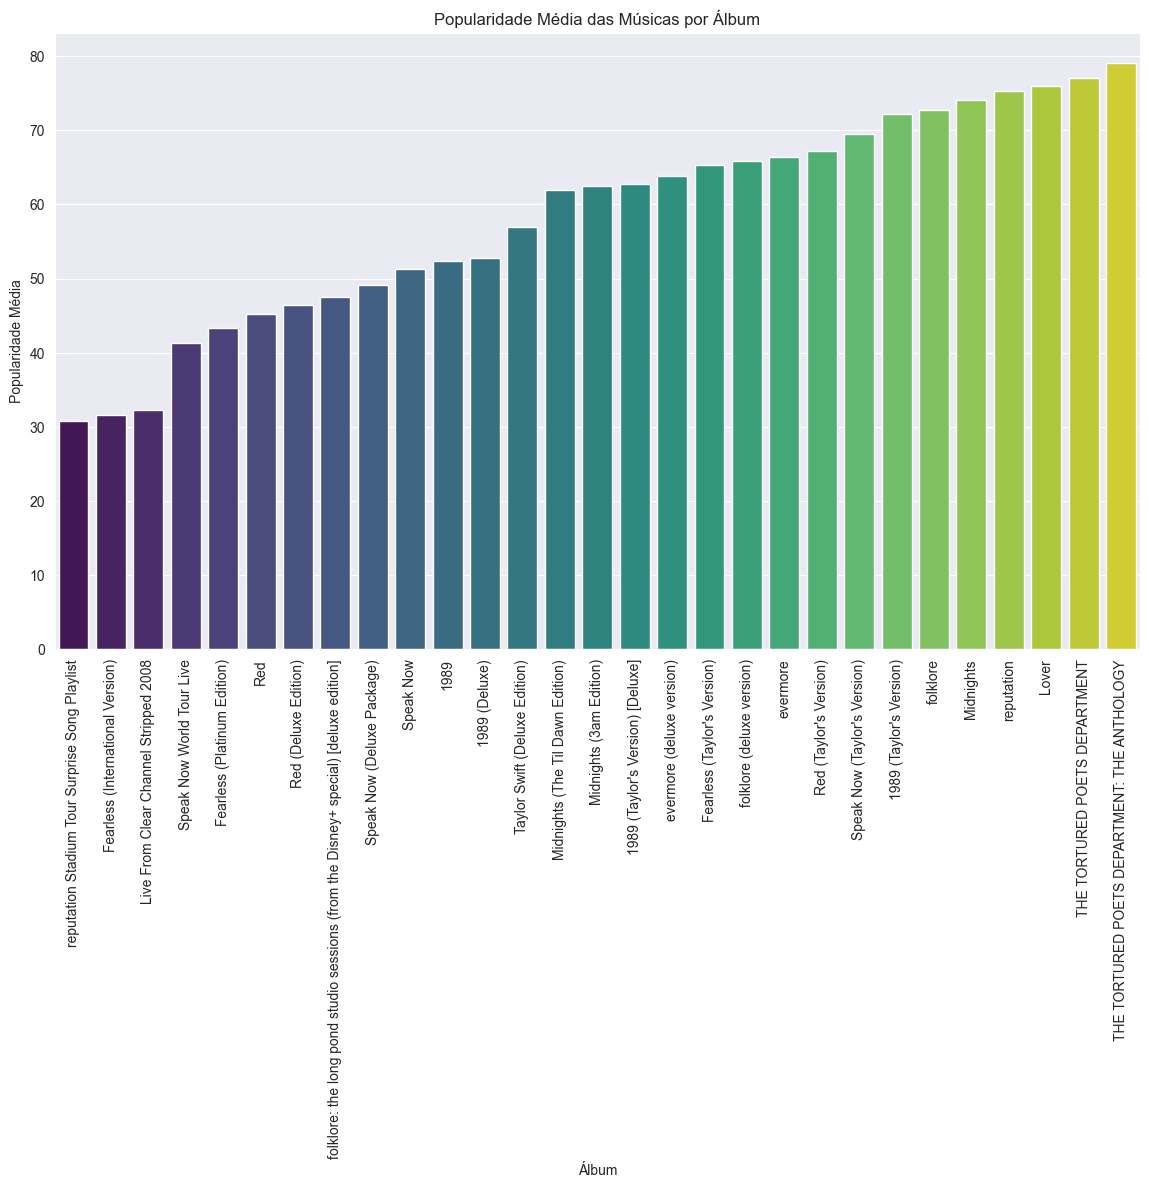

In [47]:
# Calculando a popularidade média por álbum
popularity_by_album = df.groupby('album')['popularity'].mean().sort_values()

# Plotando o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=popularity_by_album.index, y=popularity_by_album.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Popularidade Média das Músicas por Álbum")
plt.xlabel("Álbum")
plt.ylabel("Popularidade Média")
plt.show()



C:\Users\karin\AppData\Local\Temp\ipykernel_5800\3224385755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='album', y='popularity', data=df, palette='coolwarm')


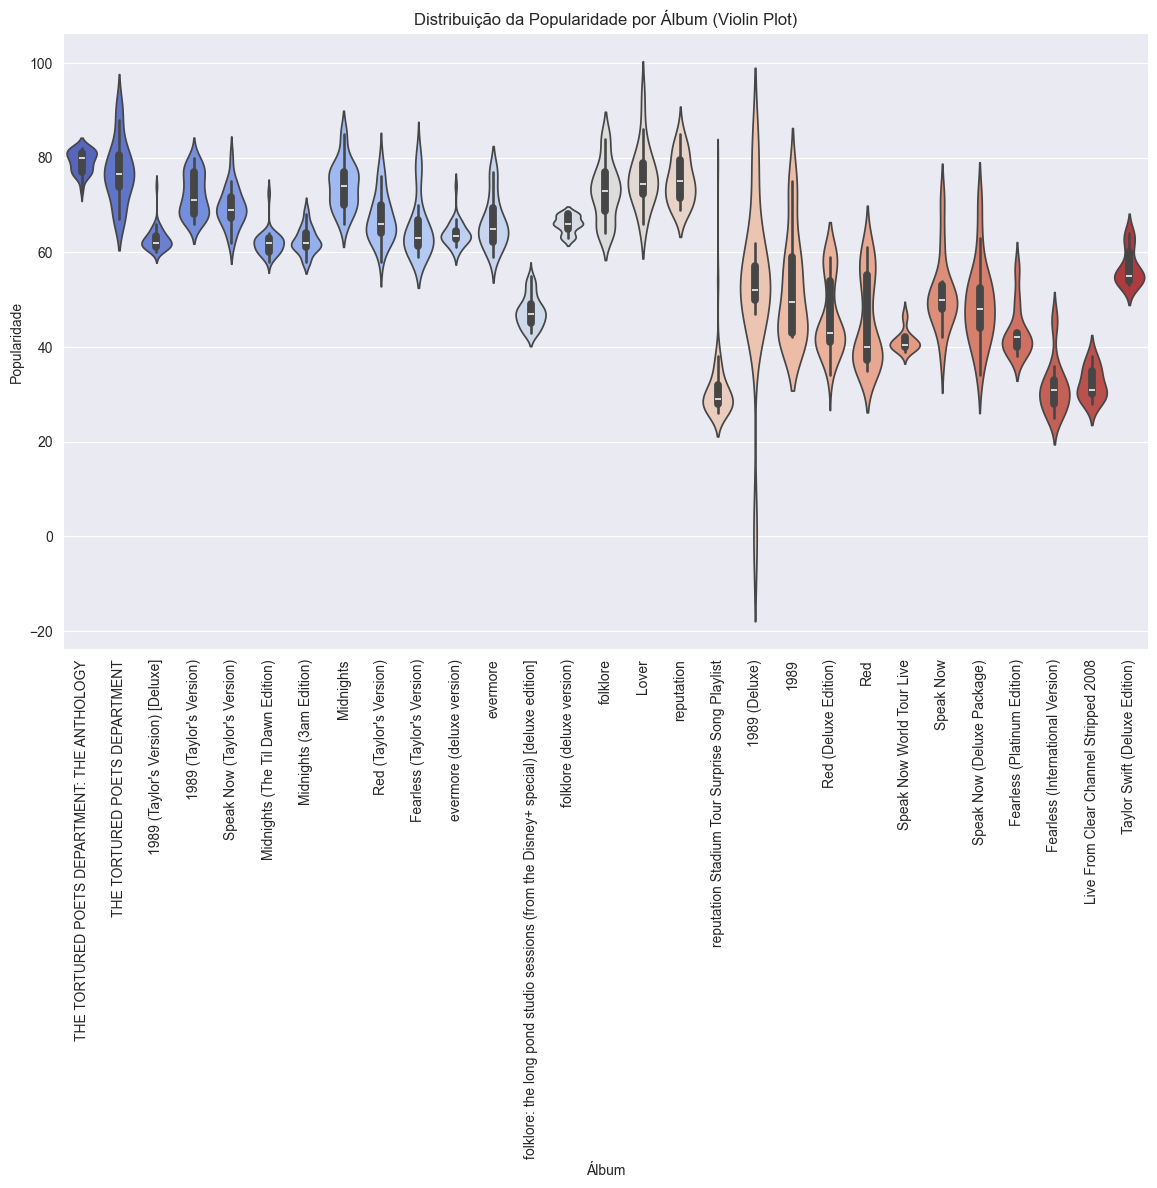

In [48]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='album', y='popularity', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Distribuição da Popularidade por Álbum (Violin Plot)")
plt.xlabel("Álbum")
plt.ylabel("Popularidade")
plt.show()


In [52]:
import plotly.express as px

# Normalizando o tamanho dos pontos para valores positivos
df['sentiment_size'] = df['title_sentiment'].abs()

# Criando o gráfico de dispersão 3D
fig = px.scatter_3d(
    df,
    x='release_year',
    y='popularity',
    z='album',
    color='album',
    size='sentiment_size',
    hover_name='name',
    title="Popularidade das Músicas de Taylor Swift ao Longo dos Anos",
    animation_frame='release_year',
    animation_group='name'
)

# Ajustando o layout para melhor visualização
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Ano de Lançamento', tickangle=45, titlefont=dict(size=14)),
        yaxis=dict(title='Popularidade', titlefont=dict(size=14)),
        zaxis=dict(title='Álbum', titlefont=dict(size=14)),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1200,  # Aumentando a largura da figura
    height=800   # Aumentando a altura da figura
)

# Ajuste da câmera para uma perspectiva melhor
fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=1.5, z=0.5)))

# Exibindo o gráfico
fig.show()


### Este projeto forneceu uma análise abrangente da popularidade das músicas de Taylor Swift, combinando técnicas de Machine Learning, análise de sentimento e visualizações interativas. Apesar das limitações, conseguimos obter insights valiosos sobre as características que influenciam o sucesso das músicas e como a popularidade evoluiu ao longo do tempo.